## Project Objective: 
Analyze and compare local and global temperature trend. 

Seoul, the capital city of South Korea, is chosen as the local city of interest.

by Junghoon Suk


---
### Overview
- Method used: Python Pandas library to calculate moving average and Matplotlib to plot a line chart for time series data.
- Data sourced: A csv file obtained from a Postgre SQL e-database, provided on Udacity platform.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
weather = pd.read_csv('weather_seoul.csv')
print(weather.info())
weather.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             175 non-null    int64  
 1   city             175 non-null    object 
 2   country          175 non-null    object 
 3   avg_local_temp   175 non-null    float64
 4   avg_global_temp  175 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 7.0+ KB
None


,year,city,country,avg_local_temp,avg_global_temp
0,1839,Seoul,South Korea,9.47,7.63
1,1840,Seoul,South Korea,10.21,7.80
2,1841,Seoul,South Korea,9.44,7.69
3,1842,Seoul,South Korea,10.13,8.02
4,1843,Seoul,South Korea,10.33,8.17


#### Content

SQL LEFT JOIN was used to combine local and global temperature.
A cleaning is required to ensure data quality and tidiness issues.

- year: year that tempearture is measured
- city: local city of interest
- country: local country of interest
- avg_temp: average local temperature in a given year
- avg_temp.1: average global temperature in a given year


### Assessment and Cleaning

There is no big quality and tidiness issue found, other than datatype of 'year' feature. I will keep the dataset as it is for now.

### Calculating the moving average

In [3]:
len(weather)

175

In [4]:
weather['10yrMA_local_temp'] = weather['avg_local_temp'].rolling(10).mean()
weather['10yrMA_global_temp'] = weather['avg_global_temp'].rolling(10).mean()

In [5]:
weather_ma10 = weather.dropna().reset_index(drop = True)
weather_ma10

,year,city,country,avg_local_temp,avg_global_temp,10yrMA_local_temp,10yrMA_global_temp
0,1848,Seoul,South Korea,10.36,7.98,10.150,7.943
1,1849,Seoul,South Korea,10.39,7.98,10.242,7.978
2,1850,Seoul,South Korea,9.69,7.90,10.190,7.988
3,1851,Seoul,South Korea,9.33,8.18,10.179,8.037
4,1852,Seoul,South Korea,9.52,8.10,10.118,8.045
...,...,...,...,...,...,...,...
161,2009,Seoul,South Korea,11.84,9.51,11.809,9.493
162,2010,Seoul,South Korea,11.30,9.70,11.797,9.543
163,2011,Seoul,South Korea,11.12,9.52,11.749,9.554
164,2012,Seoul,South Korea,11.23,9.51,11.692,9.548


In [6]:
start = min(weather_ma10.year)
end = max(weather_ma10.year)
range = end-start
frequency = range / 5
print(start, end, range, frequency)

1848 2013 165 33.0


### Ploting moving average line charts

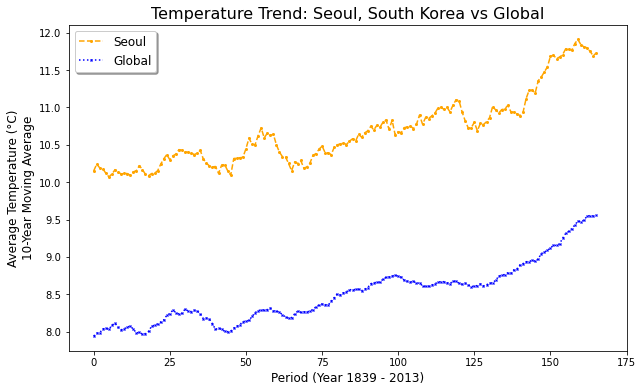

In [13]:
plt.figure(figsize = [10,6])

plt.plot(weather_ma10['10yrMA_local_temp'], 
         c = 'orange', marker = 'o', ms = 2, ls = '--', label = 'Seoul')
plt.plot(weather_ma10['10yrMA_global_temp'], 
         c = 'blue', marker = 'x', ms = 2, ls = ':', label = 'Global' )

plt.title('Temperature Trend: Seoul, South Korea vs Global', fontsize = 16)
plt.ylabel('Average Temperature (°C)\n10-Year Moving Average', fontsize = 12)
plt.xlabel('Period (Year 1839 - 2013)',fontsize = 12)
plt.xticks(np.arange(0, 200, 25))
plt.legend(prop={'size':12}, frameon = True, shadow = True, fancybox = True, framealpha = 1,
           loc='best');

For the past 175 years, the average temperature in Seoul shows a constant increase, which is same for the global temperature.

The average temperature of Seoul in 2013 reached above 11.5°C as opposed to the near 10.0°C level in the starting year of 1839. The increase is around 1.5°C and is similar to the degree of rise observed in the global temperature trend (8.0°C to 9.5°°C).

It is also noticeable the the graph looks steeper in recent 25 years for Seoul.

### Using scatterplot to visualize the relationship

In [14]:
corr = weather_ma10.corr().loc['avg_local_temp', 'avg_global_temp']
corr

0.696847570060853

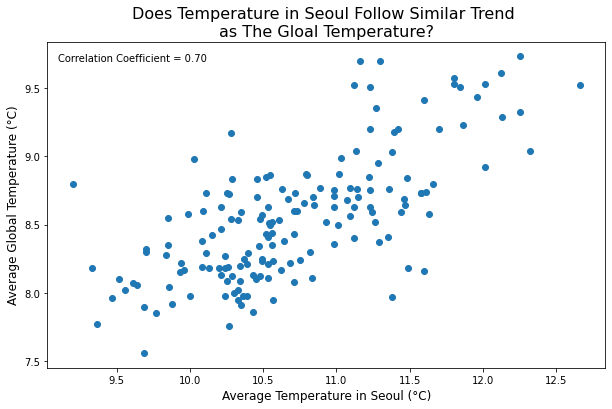

In [9]:
plt.figure(figsize = [10, 6])

plt.scatter(data = weather_ma10, x = 'avg_local_temp', y = 'avg_global_temp');

plt.title('Does Temperature in Seoul Follow Similar Trend \nas The Gloal Temperature?', fontsize = 16)
plt.ylabel('Average Global Temperature (°C)', fontsize = 12)
plt.xlabel('Average Temperature in Seoul (°C)', fontsize = 12);
plt.text(x = 9.1, y = 9.7, s = 'Correlation Coefficient = {:0.2f}'.format(corr));

The average temperature in Seoul has a moderately, positive relationship with the global temperature. 

From the earlier time series chart, it is understood that temperatures in both Seoul and the global have a constant increasing trend, with the similar level of rise by 1.5 °C for the past 175 years. It is the degree of the rise or fall that seemingly differ every year.